In [17]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.linalg as la
from numpy.linalg import eig
from sklearn.decomposition import PCA

In [2]:
# PCA with 8 components

pca = PCA(n_components=8)
pca

PCA(n_components=8)

In [3]:
df_mde = pd.read_csv('MDE.csv')
df_mde

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,90,88,98,91,95,96,67,95,86,87,94,91,95
1,88,89,95,91,90,97,84,75,88,86,65,96,96
2,78,88,98,85,82,74,76,84,86,95,91,88,96
3,80,85,81,91,92,97,99,99,92,91,86,95,96
4,69,95,67,88,84,85,86,96,91,97,79,89,90
5,78,79,78,81,80,86,91,79,74,85,98,99,93
6,93,95,96,69,79,89,78,84,82,86,85,94,79
7,89,88,85,94,80,82,90,92,96,77,95,98,79
8,78,99,90,90,90,92,96,93,98,85,86,88,81
9,78,95,96,91,75,73,74,83,85,94,95,90,88


In [4]:
df_mde.shape

(13, 13)

In [5]:
pca.fit(df_mde)

PCA(n_components=8)

In [6]:
pca.components_

array([[-6.99078958e-03,  1.60221296e-01, -1.88764060e-01,
         2.77085417e-01,  3.31556720e-01,  4.34703949e-01,
         4.41218293e-01,  3.77666911e-01,  3.42026294e-01,
        -8.50061021e-02, -3.11015904e-01,  2.40395884e-02,
         6.44359318e-02],
       [ 3.91033215e-01,  2.43926045e-01,  7.00875106e-01,
         7.83045692e-02,  1.72836169e-01,  2.02892658e-01,
        -3.93976059e-01, -8.42182953e-04,  9.66573278e-02,
        -1.08835960e-01, -1.73195299e-01, -1.92085728e-02,
         1.11474155e-01],
       [ 2.07597611e-01, -3.59688990e-01, -8.88171775e-02,
        -2.75651252e-01,  1.38722293e-01,  4.02448801e-01,
         1.59916440e-01, -4.44739749e-01, -3.89606871e-01,
        -1.10016520e-01, -3.32981234e-01,  1.87667688e-01,
         1.70547715e-01],
       [ 4.09751937e-01, -3.39765659e-03,  7.37198526e-02,
        -1.52863692e-01, -7.76384568e-02,  8.41437523e-02,
         2.86353276e-01,  9.13668462e-02, -2.84277413e-03,
        -4.00983513e-01,  3.47605663e

In [7]:
# Get new dimensions


df_mde_pca = pca.transform(df_mde)
df_mde_pca

array([[  0.77832315,  21.96254677,  -2.70271463,  -2.99231935,
         16.54066921,  -8.71829461,   5.33465858,   0.34287085],
       [ 10.21626509,  17.31998911,  18.2072092 , -10.0984683 ,
         -9.34682922,   9.14804075,   3.78775831,   1.46621244],
       [-14.61207945,   6.37128968,  -8.13950048, -11.58593536,
          1.58948447,   3.40968709,  -5.13264675,   0.68890282],
       [ 23.00709784,  -5.95585639,   1.94227828,  -2.92665743,
          9.03687917,  -0.36752877,  -3.88416574,  -2.0943849 ],
       [ 12.55410569, -16.64921193,  -8.64056555, -14.37340721,
         -8.22154879,  -7.86569396,   4.57527645,  -4.03195346],
       [ -9.46409596, -15.80076773,  12.14831578,   2.5783566 ,
          9.56851344,   3.91874256,  -3.81840664,  -5.11159697],
       [-10.93103325,  12.64833018,   5.75825169,  12.02717951,
        -11.70739939,  -9.05826791,  -2.14101323,  -7.59325178],
       [  5.12292714,  -1.83322058,  -9.82943731,  16.91685595,
          2.67933756,  10.8852753

In [8]:
df_mde_pca.shape

(13, 8)

In [9]:
pca = PCA()
pca.fit(df_mde)  # Calculating all eigen vectors and eigen values

PCA()

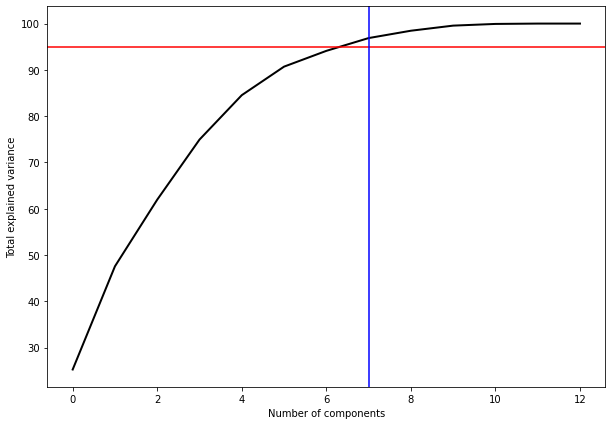

In [10]:
# Visualize Variance by new Dimensions
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.axhline(95, c='r')
plt.axvline(7, c='b')

In [11]:
np.cumsum(pca.explained_variance_ratio_) 

array([0.25250366, 0.47553925, 0.61952601, 0.74932851, 0.84530688,
       0.90695831, 0.9410309 , 0.96866643, 0.98455071, 0.99557371,
       0.99923539, 1.        , 1.        ])

According to analysis above, 13 indexes will be concentrated to 8 primary components with the contribution rate of 95%.

# Step by step calculation 

In [12]:
# Print out the number of features in the dataset.
df_mde.shape

(13, 13)

In [19]:
# Conduct the PCA step by step for the given dataset

# 1 define a matrix with the dataframe
data = np.array(df_mde)

# 2 calculate the mean of each column
M = np.mean(data.T, axis=1)
print(M)

[81.92307692 88.15384615 86.84615385 86.07692308 84.69230769 86.61538462
 84.61538462 86.69230769 86.         88.84615385 88.         92.38461538
 87.53846154]


In [20]:
# 3 center columns by subtracting column means
C = data - M
print(C)

[[  8.07692308  -0.15384615  11.15384615   4.92307692  10.30769231
    9.38461538 -17.61538462   8.30769231   0.          -1.84615385
    6.          -1.38461538   7.46153846]
 [  6.07692308   0.84615385   8.15384615   4.92307692   5.30769231
   10.38461538  -0.61538462 -11.69230769   2.          -2.84615385
  -23.           3.61538462   8.46153846]
 [ -3.92307692  -0.15384615  11.15384615  -1.07692308  -2.69230769
  -12.61538462  -8.61538462  -2.69230769   0.           6.15384615
    3.          -4.38461538   8.46153846]
 [ -1.92307692  -3.15384615  -5.84615385   4.92307692   7.30769231
   10.38461538  14.38461538  12.30769231   6.           2.15384615
   -2.           2.61538462   8.46153846]
 [-12.92307692   6.84615385 -19.84615385   1.92307692  -0.69230769
   -1.61538462   1.38461538   9.30769231   5.           8.15384615
   -9.          -3.38461538   2.46153846]
 [ -3.92307692  -9.15384615  -8.84615385  -5.07692308  -4.69230769
   -0.61538462   6.38461538  -7.69230769 -12.        

In [22]:
# 4 Find the covariance between the features
V = np.cov(C.T)
print(V)

[[ 47.91025641   4.01282051  41.73717949  -4.91025641  10.30769231
   23.38461538 -13.94871795  -2.94230769  -3.58333333 -24.26282051
   -3.25        10.61538462 -11.53846154]
 [  4.01282051  46.64102564  23.85897436   9.98717949   3.46794872
    4.23076923  -4.76923077  22.21794872  26.33333333   0.27564103
  -17.75        -9.56410256  -7.92307692]
 [ 41.73717949  23.85897436  93.80769231   2.92948718   6.36538462
    1.76923077 -48.23076923 -12.38461538   3.25       -10.52564103
   -0.58333333  -4.26923077   7.58974359]
 [ -4.91025641   9.98717949   2.92948718  46.74358974  17.60897436
    7.69871795  10.53205128  24.10897436  29.16666667  -3.90384615
   -4.83333333  -0.78205128  14.78846154]
 [ 10.30769231   3.46794872   6.36538462  17.60897436  38.23076923
   41.45512821  12.20512821  22.06410256  11.          -3.46794872
  -19.08333333  -2.37179487  15.17948718]
 [ 23.38461538   4.23076923   1.76923077   7.69871795  41.45512821
   64.75641026  24.50641026  19.20512821   9.        

In [25]:
# 5 eigendecomposition (Eigen value and Eigen vector) of covariance matrix
values, vectors = eig(V)
print(vectors)
print(f'\n{values}')

[[-6.99078958e-03 -3.91033215e-01 -2.07597611e-01  4.09751937e-01
  -7.21031004e-02 -2.58894153e-02 -2.17750800e-01 -8.21139720e-02
   9.08579430e-02 -4.49413222e-01  3.46159156e-01  1.48521128e-01
  -4.73192777e-01]
 [ 1.60221296e-01 -2.43926045e-01  3.59688990e-01 -3.39765659e-03
   3.96672251e-01 -1.15039735e-01  3.16657125e-01 -3.16648372e-01
   5.33634313e-01  2.30613214e-01  1.00235602e-01  2.47242293e-01
  -7.20874688e-02]
 [-1.88764060e-01 -7.00875106e-01  8.88171775e-02  7.37198526e-02
  -2.28215647e-02  2.16934157e-01  4.40720861e-01  1.78762456e-01
  -2.21290229e-01 -1.15343880e-01 -2.37253460e-01 -1.52621586e-01
   2.10216160e-01]
 [ 2.77085417e-01 -7.83045692e-02  2.75651252e-01 -1.52863692e-01
  -2.56351797e-01  4.67921717e-01 -2.84202653e-01  4.05506796e-01
   4.90342386e-01 -6.87579131e-02 -1.42080433e-01 -1.12978854e-01
  -9.87566771e-02]
 [ 3.31556720e-01 -1.72836169e-01 -1.38722293e-01 -7.76384568e-02
  -2.49149071e-01 -2.38471188e-01  7.03067155e-02  4.31278180e-01


In [24]:
# 6 project data
P = vectors.T.dot(C.T)
print(P.T)

[[ 7.78323146e-01 -2.19625468e+01  2.70271463e+00 -2.99231935e+00
  -1.65406692e+01 -8.71829461e+00 -5.33465858e+00  3.42870851e-01
   2.81475090e-01  2.65171372e+00 -1.65022158e-01 -2.25797369e-15
   9.95096179e-02]
 [ 1.02162651e+01 -1.73199891e+01 -1.82072092e+01 -1.00984683e+01
   9.34682922e+00  9.14804075e+00 -3.78775831e+00  1.46621244e+00
   1.20477163e+00 -2.86639801e-01 -5.01301620e-01  2.83517443e-15
   2.63370668e-01]
 [-1.46120794e+01 -6.37128968e+00  8.13950048e+00 -1.15859354e+01
  -1.58948447e+00  3.40968709e+00  5.13264675e+00  6.88902822e-01
  -4.31917558e+00 -2.48943177e+00  2.28630017e+00  2.61312983e-15
   9.49747860e-01]
 [ 2.30070978e+01  5.95585639e+00 -1.94227828e+00 -2.92665743e+00
  -9.03687917e+00 -3.67528773e-01  3.88416574e+00 -2.09438490e+00
  -3.51153376e+00 -4.50292025e+00 -1.82906565e+00 -2.82696299e-15
  -6.42267268e-01]
 [ 1.25541057e+01  1.66492119e+01  8.64056555e+00 -1.43734072e+01
   8.22154879e+00 -7.86569396e+00 -4.57527645e+00 -4.03195346e+00
